In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=  pd.read_csv("C:\\Users\\pavel\\OneDrive\\Desktop\\Sem 4\\Capstone Project 2\\amazon.csv")

In [3]:
data.head()

,index,orderID,date,shipStatus,Fulfilment,Sales Channel,serviceLevel,style,sku,productCategory,size,asin,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer


In [4]:
data.nunique()

index                128845
orderID              120254
date                     91
shipStatus               12
Fulfilment                2
Sales Channel             1
serviceLevel              2
style                  1376
sku                    7185
productCategory           9
size                     11
asin                   7181
courierShipStatus         4
orderQuantity             7
orderAmount (INR)      1410
city                   8956
state                    70
zip                    9460
promotion              5788
customerType              2
dtype: int64

In [5]:
data.apply(pd.unique)

index                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
orderID              [405-8078784-5731545, 171-9198151-1101146, 404...
date                 [2022-04-30, 2022-04-29, 2022-04-28, 2022-04-2...
shipStatus           [Cancelled, Shipped - Delivered to Buyer, Ship...
Fulfilment                                          [Merchant, Amazon]
Sales Channel                                              [Amazon.in]
serviceLevel                                     [Standard, Expedited]
style                [SET389, JNE3781, JNE3371, J0341, JNE3671, SET...
sku                  [SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X...
productCategory      [Set, kurta, Western Dress, Top, Ethnic Dress,...
size                  [S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]
asin                 [B09KXVBD7Z, B09K3WFS32, B07WV4JV4D, B099NRCT7...
courierShipStatus             [unknown, Shipped, Cancelled, Unshipped]
orderQuantity                                    [0, 1, 2, 3, 5, 4, 8]
orderA

## Handling Categorical Variables

In [6]:

df= pd.get_dummies(data, columns=['Fulfilment'], prefix=['Fulfilment'])

df['Fulfilment_merchant'] = 0
df['Fulfilment_amazon'] = 1

df= df.drop(['Fulfilment_merchant', 'Fulfilment_amazon'], axis=1)


In [7]:
df.head()

,index,orderID,date,shipStatus,Sales Channel,serviceLevel,style,sku,productCategory,size,...,courierShipStatus,orderQuantity,orderAmount (INR),city,state,zip,promotion,customerType,Fulfilment_Amazon,Fulfilment_Merchant
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer,0,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,1,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer,1,0


In [8]:
df_1= pd.get_dummies(df, columns=['serviceLevel'], prefix=['serviceLevel'])



In [9]:
df_1.head()

,index,orderID,date,shipStatus,Sales Channel,style,sku,productCategory,size,asin,...,orderAmount (INR),city,state,zip,promotion,customerType,Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer,0,1,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer,0,1,0,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,1,0,1,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer,0,1,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer,1,0,1,0


In [10]:
size_mapping = {"XS":1,"S": 2, "M": 3, "L": 4, "XL": 5, "XXL": 6,"3XL":7,"4XL":8,"5XL":9,"6XL":10,"Free":0}

df_1['size'] = df_1['size'].map(size_mapping)


In [11]:
df_1.head()

,index,orderID,date,shipStatus,Sales Channel,style,sku,productCategory,size,asin,...,orderAmount (INR),city,state,zip,promotion,customerType,Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,SET389,SET389-KR-NP-S,Set,2,B09KXVBD7Z,...,647.62,MUMBAI,MAHARASHTRA,400081.0,no promotion,consumer,0,1,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,7,B09K3WFS32,...,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,consumer,0,1,0,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,5,B07WV4JV4D,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,1,0,1,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,J0341,J0341-DR-L,Western Dress,4,B099NRCT7B,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no promotion,consumer,0,1,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,7,B098714BZP,...,574.00,CHENNAI,TAMIL NADU,600073.0,no promotion,consumer,1,0,1,0


In [12]:
df_2= pd.get_dummies(df_1, columns=['courierShipStatus'], prefix=['courierShipStatus'])

In [13]:
df_2.head()

,index,orderID,date,shipStatus,Sales Channel,style,sku,productCategory,size,asin,...,promotion,customerType,Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,SET389,SET389-KR-NP-S,Set,2,B09KXVBD7Z,...,no promotion,consumer,0,1,0,1,0,0,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,7,B09K3WFS32,...,Amazon PLCC Free-Financing Universal Merchant ...,consumer,0,1,0,1,0,1,0,0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,5,B07WV4JV4D,...,IN Core Free Shipping 2015/04/08 23-48-5-108,business,1,0,1,0,0,1,0,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,J0341,J0341-DR-L,Western Dress,4,B099NRCT7B,...,no promotion,consumer,0,1,0,1,0,0,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,7,B098714BZP,...,no promotion,consumer,1,0,1,0,0,1,0,0


In [14]:
df_3= pd.get_dummies(df_2, columns=['customerType'], prefix=['customerType'])

In [15]:
df_3.head()

,index,orderID,date,shipStatus,Sales Channel,style,sku,productCategory,size,asin,...,Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown,customerType_business,customerType_consumer
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,SET389,SET389-KR-NP-S,Set,2,B09KXVBD7Z,...,0,1,0,1,0,0,0,1,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,7,B09K3WFS32,...,0,1,0,1,0,1,0,0,0,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,5,B07WV4JV4D,...,1,0,1,0,0,1,0,0,1,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,J0341,J0341-DR-L,Western Dress,4,B099NRCT7B,...,0,1,0,1,0,0,0,1,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,7,B098714BZP,...,1,0,1,0,0,1,0,0,0,1


In [16]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128845 entries, 0 to 128844
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   index                        128845 non-null  int64  
 1   orderID                      128845 non-null  object 
 2   date                         128845 non-null  object 
 3   shipStatus                   128845 non-null  object 
 4   Sales Channel                128845 non-null  object 
 5   style                        128845 non-null  object 
 6   sku                          128845 non-null  object 
 7   productCategory              128845 non-null  object 
 8   size                         128845 non-null  int64  
 9   asin                         128845 non-null  object 
 10  orderQuantity                128845 non-null  int64  
 11  orderAmount (INR)            128845 non-null  float64
 12  city                         128845 non-null  object 
 13 

In [17]:
df_3.nunique()

index                          128845
orderID                        120254
date                               91
shipStatus                         12
Sales Channel                       1
style                            1376
sku                              7185
productCategory                     9
size                               11
asin                             7181
orderQuantity                       7
orderAmount (INR)                1410
city                             8956
state                              70
zip                              9460
promotion                        5788
Fulfilment_Amazon                   2
Fulfilment_Merchant                 2
serviceLevel_Expedited              2
serviceLevel_Standard               2
courierShipStatus_Cancelled         2
courierShipStatus_Shipped           2
courierShipStatus_Unshipped         2
courierShipStatus_unknown           2
customerType_business               2
customerType_consumer               2
dtype: int64

In [18]:
unique_values = df_3['productCategory'].unique()
print(unique_values)

['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress' 'Bottom' 'Saree'
 'Blouse' 'Dupatta']


In [19]:
size_mapping_2 = {"Set":1,"kurta":2 ,"Western Dress":3,"Top":4,"Ethnic Dress":5,"Bottom":6,"Saree":7,"Blouse":8,"Dupatta":9}

df_3['productCategory'] = df_3['productCategory'].map(size_mapping_2)

In [20]:
df_3.head()

,index,orderID,date,shipStatus,Sales Channel,style,sku,productCategory,size,asin,...,Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown,customerType_business,customerType_consumer
0,0,405-8078784-5731545,2022-04-30,Cancelled,Amazon.in,SET389,SET389-KR-NP-S,1,2,B09KXVBD7Z,...,0,1,0,1,0,0,0,1,0,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Amazon.in,JNE3781,JNE3781-KR-XXXL,2,7,B09K3WFS32,...,0,1,0,1,0,1,0,0,0,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon.in,JNE3371,JNE3371-KR-XL,2,5,B07WV4JV4D,...,1,0,1,0,0,1,0,0,1,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Amazon.in,J0341,J0341-DR-L,3,4,B099NRCT7B,...,0,1,0,1,0,0,0,1,0,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon.in,JNE3671,JNE3671-TU-XXXL,4,7,B098714BZP,...,1,0,1,0,0,1,0,0,0,1


In [21]:
Amazon_data = df_3.select_dtypes(include=['float64', 'int64','uint8'])


In [22]:
Amazon_data.head()

,index,productCategory,size,orderQuantity,orderAmount (INR),Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown,customerType_business,customerType_consumer
0,0,1,2,0,647.62,0,1,0,1,0,0,0,1,0,1
1,1,2,7,1,406.00,0,1,0,1,0,1,0,0,0,1
2,2,2,5,1,329.00,1,0,1,0,0,1,0,0,1,0
3,3,3,4,0,753.33,0,1,0,1,0,0,0,1,0,1
4,4,4,7,1,574.00,1,0,1,0,0,1,0,0,0,1


In [23]:
Amazon_data.shape

(128845, 15)

In [24]:
 Amazon_data.drop(['index'],axis=1,inplace=True)

In [25]:
Amazon_data.head()

,productCategory,size,orderQuantity,orderAmount (INR),Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown,customerType_business,customerType_consumer
0,1,2,0,647.62,0,1,0,1,0,0,0,1,0,1
1,2,7,1,406.00,0,1,0,1,0,1,0,0,0,1
2,2,5,1,329.00,1,0,1,0,0,1,0,0,1,0
3,3,4,0,753.33,0,1,0,1,0,0,0,1,0,1
4,4,7,1,574.00,1,0,1,0,0,1,0,0,0,1


## Exploratory Data Analysis (EDA)

<AxesSubplot:>

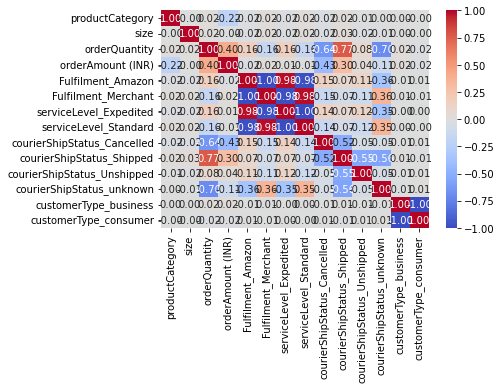

In [26]:
sns.heatmap(Amazon_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

C:\Users\pavel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='orderAmount (INR)'>

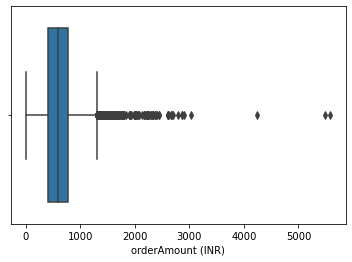

In [27]:
sns.boxplot(Amazon_data['orderAmount (INR)'])

### Removing Outliers

In [28]:
# Calculate the IQR
Q1 = Amazon_data['orderAmount (INR)'].quantile(0.25)
Q3 = Amazon_data['orderAmount (INR)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers
outliers = (Amazon_data['orderAmount (INR)'] < lower_bound) | (Amazon_data['orderAmount (INR)'] > upper_bound)
Amazon_df = Amazon_data.drop(Amazon_data[outliers].index)

# Display information about the removed outliers
print(f"Number of outliers removed: {sum(outliers)}")


Number of outliers removed: 3174


C:\Users\pavel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='orderAmount (INR)'>

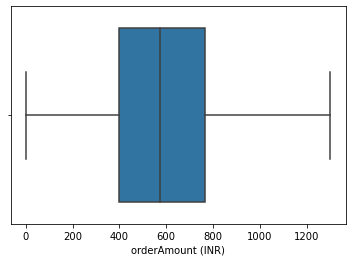

In [29]:
sns.boxplot(Amazon_df['orderAmount (INR)'])

In [30]:
Amazon_df.head()

,productCategory,size,orderQuantity,orderAmount (INR),Fulfilment_Amazon,Fulfilment_Merchant,serviceLevel_Expedited,serviceLevel_Standard,courierShipStatus_Cancelled,courierShipStatus_Shipped,courierShipStatus_Unshipped,courierShipStatus_unknown,customerType_business,customerType_consumer
0,1,2,0,647.62,0,1,0,1,0,0,0,1,0,1
1,2,7,1,406.00,0,1,0,1,0,1,0,0,0,1
2,2,5,1,329.00,1,0,1,0,0,1,0,0,1,0
3,3,4,0,753.33,0,1,0,1,0,0,0,1,0,1
4,4,7,1,574.00,1,0,1,0,0,1,0,0,0,1


In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
Scaler=StandardScaler()

In [33]:
Amazon_df=Scaler.fit_transform(Amazon_df)

In [34]:
Amazon_df

array([[-8.94469728e-01, -1.12843354e+00, -2.94210483e+00, ...,
         4.17228224e+00, -8.18834789e-02,  8.18834789e-02],
       [-7.35549988e-03,  1.50078012e+00,  3.25568667e-01, ...,
        -2.39676978e-01, -8.18834789e-02,  8.18834789e-02],
       [-7.35549988e-03,  4.49094657e-01,  3.25568667e-01, ...,
        -2.39676978e-01,  1.22124757e+01, -1.22124757e+01],
       ...,
       [ 8.79758728e-01,  9.74937390e-01,  3.25568667e-01, ...,
        -2.39676978e-01, -8.18834789e-02,  8.18834789e-02],
       [-8.94469728e-01, -1.65427627e+00,  3.25568667e-01, ...,
        -2.39676978e-01, -8.18834789e-02,  8.18834789e-02],
       [-8.94469728e-01, -1.12843354e+00,  3.25568667e-01, ...,
        -2.39676978e-01, -8.18834789e-02,  8.18834789e-02]])

In [35]:
from sklearn.decomposition import PCA

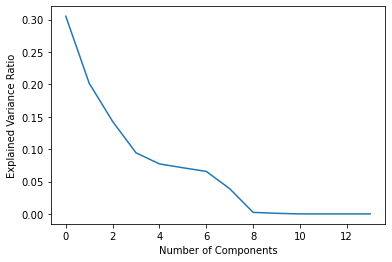

In [36]:

pca = PCA().fit(Amazon_df)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

#### To make the model perform better we took n_components = 2 instead of 8

In [37]:
pca_1 = PCA(n_components=2)

In [38]:
Amazon_df_trf = pca_1.fit_transform(Amazon_df)

In [39]:
Amazon_df_trf.shape

(125671, 2)

In [40]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=Amazon_df_trf, columns=['PC1', 'PC2'])

In [41]:
pca_df.head()

,PC1,PC2
0,4.711705,-3.019465
1,2.682858,1.109176
2,-1.377108,0.815399
3,4.724662,-2.875949
4,-1.375279,0.280563


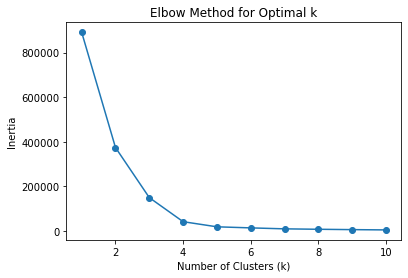

In [42]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [43]:
# Perform K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k,max_iter=100,random_state=42)

pca_df['cluster']=kmeans.fit_predict(pca_df)


In [45]:
pca_df.head()

,PC1,PC2,cluster
0,4.711705,-3.019465,2
1,2.682858,1.109176,0
2,-1.377108,0.815399,1
3,4.724662,-2.875949,2
4,-1.375279,0.280563,1


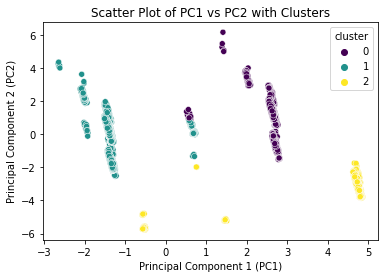

In [46]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Scatter Plot of PC1 vs PC2 with Clusters')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


In [47]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette_avg = silhouette_score(pca_df, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8309569726080214
